## Housing Affordability in Austin, Texas
Our analysis will go here

## Data Import and Cleanup
- Import dependencies
- Load data into dataframes
- Grab columns we want for analysis

In [1]:
# import data and dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [61]:
# read in data into dataframes 
age_nativity = pd.read_csv("data/age_by_nativity.csv")
employment_by_industry = pd.read_csv("data/employment_by_industries.csv")
property_value = pd.read_csv("data/property_value.csv")
demographics = pd.read_csv("data/tdc_download_tool.csv")
wage_by_gender = pd.read_csv("data/wage_by_gender_in_common_jobs.csv")
wage_by_race = pd.read_csv("data/wage_by_race_and_ethnicity_in_common_jobs.csv")
wage_distribution = pd.read_csv("data/wage_distribution.csv")


In [63]:
# grab columns we want about propery data 
property_value = property_value[['ID Value Bucket',
                'Value Bucket',
               'Year',
               'Property Value by Bucket',
               'Property Value by Bucket Moe',
               'Geography',
               'share']]
property_value

,ID Value Bucket,Value Bucket,Year,Property Value by Bucket,Property Value by Bucket Moe,Geography,share
0,0,"Less Than $10,000",2017,1000376,16112.0,United States,0.013045
1,25,"$2,000,000 or More",2017,2224,832.0,"Austin, TX",0.013137
2,2,"$15,000 to $19,999",2017,484108,10315.0,United States,0.006313
3,3,"$20,000 to $24,999",2017,537939,9802.0,United States,0.007015
4,4,"$25,000 to $29,999",2017,495363,10768.0,United States,0.006460
5,5,"$30,000 to $34,999",2017,596891,10224.0,United States,0.007784
6,6,"$35,000 to $39,999",2017,447506,11066.0,United States,0.005836
7,7,"$40,000 to $49,999",2017,1167440,17521.0,United States,0.015224
8,8,"$50,000 to $59,999",2017,1398870,16934.0,United States,0.018242
9,9,"$60,000 to $69,999",2017,1668358,21640.0,United States,0.021756


In [4]:
# grab columns we want about population data 
age_nativity[['ID Age',
              'Age', 
              'Year', 
              'Birthplace', 
              'Birthplace Moe', 
              'nativity', 
              'share']]

,ID Age,Age,Year,Birthplace,Birthplace Moe,nativity,share
0,30,75 Years & Over,2017,28181,3700.0,Native Born,0.029642
1,3,5 to 17 Years,2017,123858,8350.0,Native Born,0.130279
2,6,18 to 24 Years,2017,82741,7676.0,Native Born,0.087030
3,9,25 to 34 Years,2017,164386,12126.0,Native Born,0.172908
4,12,35 to 44 Years,2017,110346,7788.0,Native Born,0.116066
5,15,45 to 54 Years,2017,83728,7449.0,Native Born,0.088069
6,18,55 to 59 Years,2017,40589,5632.0,Native Born,0.042693
7,21,60 & 61 Years,2017,14902,3400.0,Native Born,0.015675
8,24,62 to 64 Years,2017,18889,4191.0,Native Born,0.019868
9,27,65 to 74 Years,2017,46788,5639.0,Native Born,0.049214


In [5]:
# grab columns we want about wage data 
wage_by_gender[["Gender",
                "Year",
               "Detailed Occupation",
               "Average Wage",
               "Average Wage Appx MOE",
               "Total Population",
               "Total Population MOE Appx",
                "Geography"]]

wage_by_race[["Race",
             "Year",
             "Detailed Occupation",
             "Average Wage",
             "Average Wage Appx MOE",
             "Total Population",
             "Total Population MOE Appx",
             "Geography"]]

wage_distribution[['Wage Bin',
                 'Year',
                 'Total Population',
                 'Total Population MOE Appx',
                 'Geography',
                 'share']]

,Wage Bin,Year,Total Population,Total Population MOE Appx,Geography,share
0,$130-140k,2017,1219921,27004.731372,United States,0.008258
1,$200k+,2017,292893,13130.056698,Texas,0.023495
2,$190-200k,2017,16152,3118.217360,Texas,0.001296
3,$10-20k,2017,19419097,100828.642897,United States,0.131461
4,$20-30k,2017,21457270,105142.742730,United States,0.145259
5,$180-190k,2017,38667,4820.259606,Texas,0.003102
6,$30-40k,2017,19361189,100700.912684,United States,0.131069
7,$40-50k,2017,15445707,91305.365256,United States,0.104562
8,$170-180k,2017,37423,4742.324025,Texas,0.003002
9,$50-60k,2017,12473792,82969.135682,United States,0.084444


In [6]:
# grab columns we want about industry data
employment_by_industry[['Industry', 
                        'Year', 
                        'Workforce by Industry and Gender', 
                        'Workforce by Industry and Gender Moe']]

,Industry,Year,Workforce by Industry and Gender,Workforce by Industry and Gender Moe
0,Educational Services,2017,58591,4083.898750
1,Public Administration,2017,29054,2868.084378
2,"Other Services, Except Public Administration",2017,26993,3119.346246
3,"Mining, Quarrying, & Oil & Gas Extraction",2017,2802,875.727126
4,Accommodation & Food Services,2017,48958,3997.982741
5,Construction,2017,41460,5012.614188
6,"Arts, Entertainment, & Recreation",2017,13123,2272.642955
7,Manufacturing,2017,41586,4264.172604
8,Health Care & Social Assistance,2017,52161,4151.356044
9,Wholesale Trade,2017,9351,1756.259662


## Austin Basics (Ashley)
- Propery values over time 
- Population changes over time 
- Wage distribution over time

<BarContainer object of 26 artists>

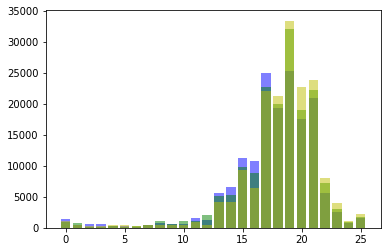

In [248]:
# charts on property values over time 
atx_property = property_value.loc[property_value["Geography"] == "Austin, TX"]
year1 = atx_property.loc[atx_property["Year"] == 2015]
year2 = atx_property.loc[atx_property["Year"] == 2016]
year3 = atx_property.loc[atx_property["Year"] == 2017]

x1 = year1["ID Value Bucket"]
y1 = year1["Property Value by Bucket"]
x2 = year2["ID Value Bucket"]
y2 = year2["Property Value by Bucket"]
x3 = year3["ID Value Bucket"]
y3 = year3["Property Value by Bucket"]
plt.bar(x1,y1,alpha=.5,color='b')
plt.bar(x2,y2,alpha=.5,color='g')
plt.bar(x3,y3,alpha=.5,color='y')
# plt.plot(x3,y3)

In [ ]:
# charts on population changes over time 
# show which working ages live here
# include age nativity

In [ ]:
# charts on wage distribution over time 
# show which wage bins can afford to live here and the # against total population

## Austin Income Differences (Valeria & Vincent)
- Wage vs gender over time 
- Wage vs race over time 

In [ ]:
# charts on wage vs gender over time 
# what is the gender/occupation that can afford to live in austin each year?
# what is the gender/occupation that cannot afford to live in austin each year? 

In [ ]:
# charts on wage vs race over time 
# what is the race/occupation that can afford to live in austin each year?
# what is the race/occupation that cannot afford to live in austin each year?

## Austin Industry Information (Mark)
- Changes in industry over time 

In [ ]:
# charts on industry changes over time 
# what trends do we see in industry?
# which genders/races typically work in the top industry? can they afford to live in austin each year?
# which genders/races typically work in the bottom industry? can they afford to live in austin each year? 